In [1]:
class TreeNode:
    def __init__(self,data=0):
        self.val=data
        self.right=None
        self.left=None

In [2]:
class BST(TreeNode):
    def __init__(self,data=0,parent=None):
        super().__init__(data)
        self.parent=parent
    def insert(self,value,parent=None):
        new_node=BST(value)
        parent=self
        if value>self.val:
            if self.right is None:
                self.right=new_node
                self.right.parent=parent
            else:
                self.right.insert(value,parent)
        if value<self.val:
            if self.left is None:
                self.left=new_node
                self.left.parent=parent
            else:
                self.left.insert(value,parent)

In [3]:
def search(self,value):
    if self.val==value:
        return self
    if value>self.val:
        if self.right:
            return self.right.search(value)
    if value<self.val:
        if self.left:
            return self.left.search(value)
BST.search=search
    

# TREE VISUALIZATION

In [4]:

from graphviz import Digraph
def visualize_tree(tree):
    if tree is None:
        return "NOTHING IN TREE"
    def add_nodes_edges(tree,dot=None):
        if dot is None:
            dot=Digraph()
            dot.attr('node' ,shape='circle')
            dot.node(name=str(tree),label=str(tree.val))
        for child in [tree.left,tree.right]:
            if child is not None:
                if child==tree.left: dot.attr('node',shape='circle',style='filled',fillcolor='lightblue')
                if child==tree.right:dot.attr('node',shape='doublecircle',style='filled',fillcolor='seashell')
                dot.node(name=str(child),label=str(child.val))
                dot.edge(str(tree),str(child))
                dot=add_nodes_edges(child,dot=dot)
            
        return dot
    dot=add_nodes_edges(tree)
    
    display(dot)
            
                


In [5]:
b=BST(5)
b.insert(1)
b.insert(20)
b.insert(10)
b.insert(50)
b.insert(30)
b.insert(40)
b.insert(60)

print(b.right.right.parent.val)
#visualize_tree(b)

20


In [6]:
def find_root(self):
    """FIND ABSOLUTE ROOT OF BST TO WHICH SELF BELONGS"""
    temp=self
    while temp.parent is not None:
        temp=temp.parent
    return temp
    """ keep going untill no parent left"""
BST.find_root=find_root
print((b.find_root()).val)

5


In [7]:
def find_min(self):
    """FINDS MINIMUM FROM SELF TILL END OF TREE"""
    mini=self
    if self.left is not None: #as left is always smaller than root so when there is no node it is min
           mini=self.left.find_min()
    return mini
BST.find_min=find_min

1


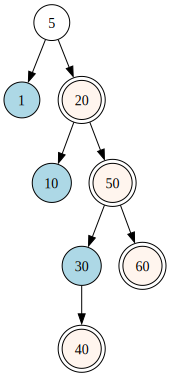

In [8]:
print(b.find_min().val)
visualize_tree(b)

In [9]:
def set_for_parent(self,node):
    """it takes one node and connect it to parent of self """
    if self.parent is None:return
    
    if self.parent.right==self:
        self.parent.right=node
    if self.parent.left==self:
        self.parent.left=node

BST.set_for_parent=set_for_parent    

In [11]:
def replace_with_node(self,node):
    """REPLACE SELF WITH NODE(WHICH IS CHILD) MAKE SURE TO SET PARENT OF NODE ASSUME WE HAVE NO CHILDREN OTHER THAN NODE"""
    self.set_for_parent(node)#replace node with parent
    node.parent=self.parent#set parent of node to parent of self(parent of new node)
    self.parent=None #self parent is none now self is not pointing to any node it is not necccessay bcz python handles it
    return node.find_root()
BST.replace_with_node=replace_with_node

In [12]:
def delete(self,val):
    #when there is only one node(root) and value matches with ir
    if self.parent is None and self.left is None and self.right is None and self.val==val:
        return None  # it will return new root of tree if there is only one node root will be none and so the tree
    
    #when node you want to delete has no child
    if self.val==val:
        if self.right is None and self.left is None:#it is leaf
            self.set_for_parent(None)  #it will be none
            return self.find_root()
        
    #when node you want to delete has one childe
        if self.right is  None: #if right is none left cannot be none bcz we have tackled leaf above 
            return self.replace_with_node(self.left)  #it replace node to be deleted with its only child
        if self.left is None:
            return self.replace_with_node(self.right)  #it replace node to be deleted with its only child
        
        #now we have both children find successor and replace it with self
        # as we consider min from right tree as sucessor it can never have two child 
        successor=self.right.find_min()
        
        #copy succersor value here
        self.val=successor.val
        
        return self.right.delete(successor.val)
        
    # if value doesnot match than if value is samller than self.val we go left else we go right    
    if val<self.val:
        if self.left:
            return self.left.delete(val)
        else:
            return self.find_root() #nothing to delet
    
    else:
        if self.right is not None:
            return self.right.delete(val)
    
        else:
            return self.find_root()
BST.delete=delete

# CHECKING DELETE

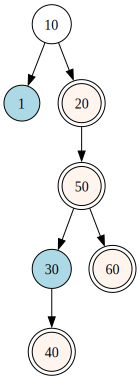

In [13]:
b=b.delete(5)
visualize_tree(b)


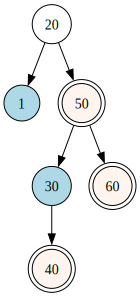

In [14]:
b=b.delete(10)
visualize_tree(b)

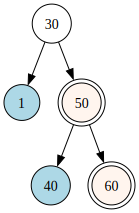

In [15]:
b=b.delete(20)
visualize_tree(b)

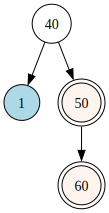

In [16]:
b=b.delete(30)
visualize_tree(b)

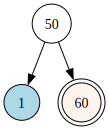

In [17]:
b=b.delete(40)
visualize_tree(b)

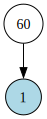

In [18]:
b=b.delete(50)
visualize_tree(b)

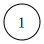

In [19]:
b=b.delete(60)
visualize_tree(b)

In [20]:
b=b.delete(1)
visualize_tree(b)

'NOTHING IN TREE'

# ISSUES WITH BST - BALANCE

In [21]:
l=[1,2,4,9,13,21,51,71,82]

In [22]:
n=BST(l[0])
for i in l:
    n.insert(i)

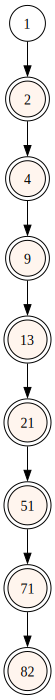

In [23]:
visualize_tree(n)

In [24]:
def dfs_pre_order(self): #depth first search
    if self.val is None:
        return    
    else:
        print(self.val)
        
        if self.right:
            self.right.dfs_pre_order()
        if self.left:
            self.left.dfs_pre_order()
    return 
TreeNode.dfs_pre_order=dfs_pre_order
"""IF ROOT IS AT START IT IS PRE ORDER TRAVERSAL 
IF ROOT IS AT MID IT IS MID ORDER TRAVERSAL
IF ROOT IS AT END IT IS IN ORDER TRAVERSAL"""

'IF ROOT IS AT START IT IS PRE ORDER TRAVERSAL \nIF ROOT IS AT MID IT IS MID ORDER TRAVERSAL\nIF ROOT IS AT END IT IS IN ORDER TRAVERSAL'

In [25]:
n.dfs_pre_order()

1
2
4
9
13
21
51
71
82


In [26]:
   """IF YOU INSERTED SORTED ELEMENT IN BST IT I HAS NO BENEFIT NOW YOY HAVE TO COVER DEPTH TO CHECK ELEMENT
        NOW WE DO ROTATION WHICH MAKE RB TRESS AND AVL TREES"""

'IF YOU INSERTED SORTED ELEMENT IN BST IT I HAS NO BENEFIT NOW YOY HAVE TO COVER DEPTH TO CHECK ELEMENT\n     NOW WE DO ROTATION WHICH MAKE RB TRESS AND AVL TREES'